In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Face_detection_2.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Face_detection_2.zip')
f.keys()
!unzip Face_detection_2.zip

Archive:  Face_detection_2.zip
   creating: Face_detection_2/
   creating: Face_detection_2/Ainul/
  inflating: Face_detection_2/Ainul/0.jpg  
  inflating: Face_detection_2/Ainul/1.jpg  
  inflating: Face_detection_2/Ainul/10.jpg  
  inflating: Face_detection_2/Ainul/107.jpg  
  inflating: Face_detection_2/Ainul/117.jpg  
  inflating: Face_detection_2/Ainul/120.jpg  
  inflating: Face_detection_2/Ainul/122.jpg  
  inflating: Face_detection_2/Ainul/123.jpg  
  inflating: Face_detection_2/Ainul/126.jpg  
  inflating: Face_detection_2/Ainul/134.jpg  
  inflating: Face_detection_2/Ainul/149.jpg  
  inflating: Face_detection_2/Ainul/150.jpg  
  inflating: Face_detection_2/Ainul/169.jpg  
  inflating: Face_detection_2/Ainul/184.jpg  
  inflating: Face_detection_2/Ainul/186.jpg  
  inflating: Face_detection_2/Ainul/188.jpg  
  inflating: Face_detection_2/Ainul/197.jpg  
  inflating: Face_detection_2/Ainul/202.jpg  
  inflating: Face_detection_2/Ainul/203.jpg  
  inflating: Face_detection_2/Ai

In [3]:
import os
print(os.listdir('/content/Face_detection_2'))

['Mim', 'Sahajahan', 'Mohona', 'Rafat', 'Jannat', 'Kafi sir', 'Rasa', 'Ainul', 'Aznur']


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [11]:
#Making the functions to get the training and validation set from the Images
X=[]
Z=[]
IMG_SIZE=150
AINUL_DIR='/content/Face_detection_2/Ainul'
AZNUR_DIR='/content/Face_detection_2/Aznur'
JANNAT_DIR='/content/Face_detection_2/Jannat'
KAFI_SIR_DIR='/content/Face_detection_2/Kafi sir'
MIM_DIR='/content/Face_detection_2/Mim'
MOHONA_DIR='/content/Face_detection_2/Mohona'
RAFAT_DIR='/content/Face_detection_2/Rafat'
RASA_DIR='/content/Face_detection_2/Rasa'
SHAJAHAN_DIR='/content/Face_detection_2/Sahajahan'

In [12]:
def assign_label(img,picture_type):
    return picture_type

In [13]:
def make_train_data(picture_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,picture_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [14]:
make_train_data('Ainul',AINUL_DIR)
print(len(X))

100%|██████████| 77/77 [00:00<00:00, 435.76it/s]

77


In [15]:
make_train_data('Aznur',AZNUR_DIR)
print(len(X))

100%|██████████| 199/199 [00:00<00:00, 928.18it/s]

276


In [16]:
make_train_data('Jannat',JANNAT_DIR)
print(len(X))

100%|██████████| 168/168 [00:00<00:00, 782.00it/s]

444


In [17]:
make_train_data('Kafi_Sir',KAFI_SIR_DIR)
print(len(X))

100%|██████████| 147/147 [00:00<00:00, 4588.44it/s]

591


In [18]:
make_train_data('Mim',MIM_DIR)
print(len(X))

100%|██████████| 149/149 [00:00<00:00, 1832.77it/s]

740


In [19]:
make_train_data('Mohona',MOHONA_DIR)
print(len(X))

100%|██████████| 151/151 [00:00<00:00, 837.35it/s]

891


In [20]:
make_train_data('Rafat',RAFAT_DIR)
print(len(X))

100%|██████████| 154/154 [00:00<00:00, 899.80it/s]

1045


In [ ]:
make_train_data('Rasa',RASA_DIR)
print(len(X))

In [22]:
make_train_data('Shajahan',SHAJAHAN_DIR)
print(len(X))

100%|██████████| 150/150 [00:00<00:00, 318.33it/s]

1346


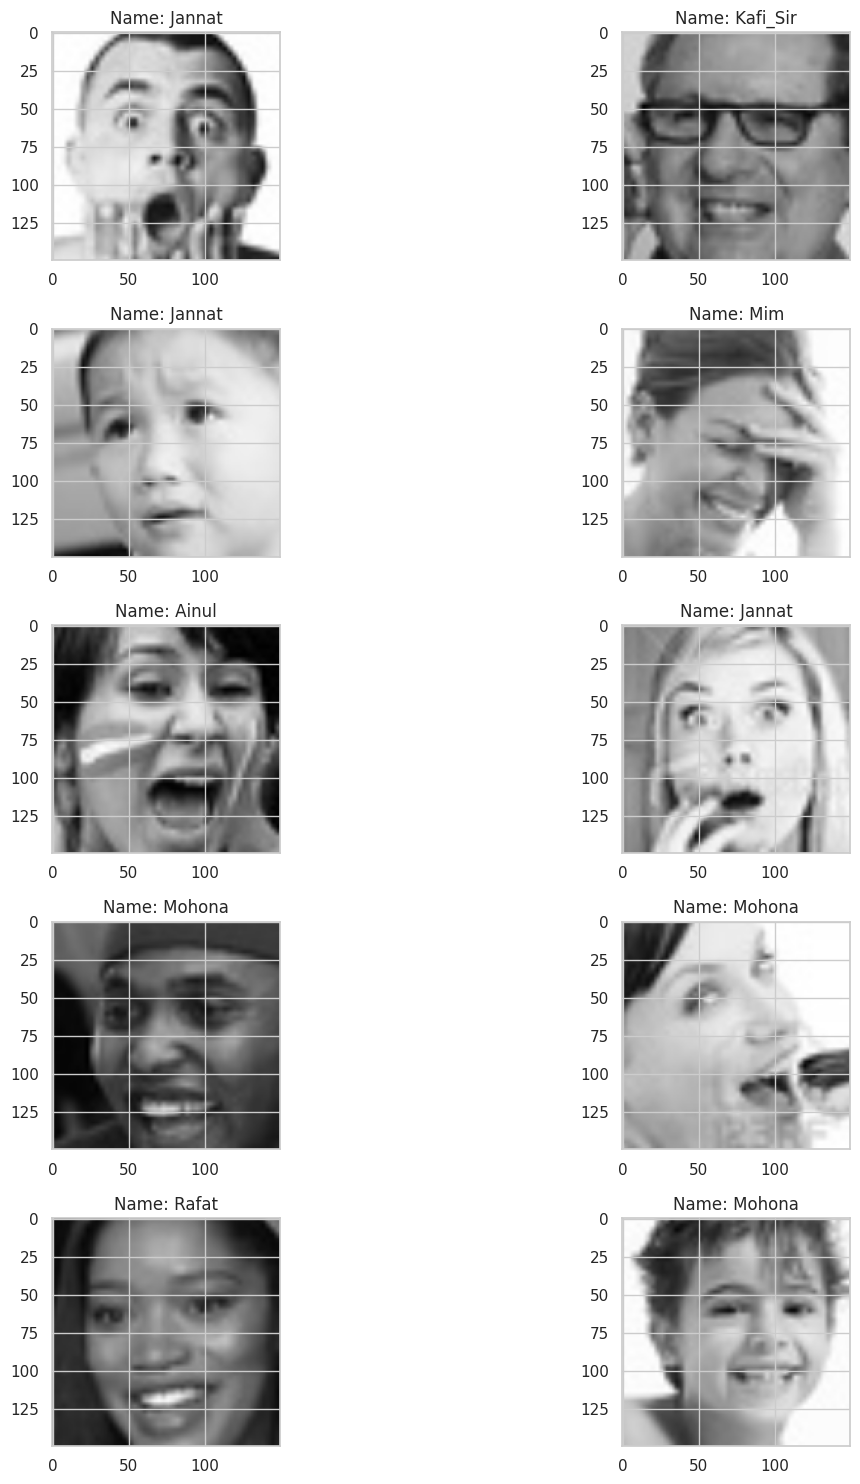

In [23]:
#visulized some random picture
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Name: '+Z[l])
        
plt.tight_layout()

In [24]:
#Label Encoding the Y array (i.e. Ainul->0, Aznur->1 etc...) & then One Hot Encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,9)
X=np.array(X)
X=X/255 

In [33]:
#Splitting into Training and Validation Sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
#Setting the Random Seeds
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [43]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model

In [44]:
from keras.layers.serialization import activation
import numpy as np
num_classes = 9  
base_model = ResNet50(include_top= False, weights= 'imagenet')

x= base_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs =base_model.input,outputs=predictions)

In [45]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
34/34 [==============================] - 16s 75ms/step - loss: 2.3328 - accuracy: 0.1171
Epoch 2/10
34/34 [==============================] - 2s 54ms/step - loss: 2.2061 - accuracy: 0.1385
Epoch 3/10
34/34 [==============================] - 2s 55ms/step - loss: 2.2312 - accuracy: 0.1320
Epoch 4/10
34/34 [==============================] - 2s 54ms/step - loss: 2.2132 - accuracy: 0.1366
Epoch 5/10
34/34 [==============================] - 2s 53ms/step - loss: 2.2064 - accuracy: 0.1441
Epoch 6/10
34/34 [==============================] - 2s 53ms/step - loss: 2.1994 - accuracy: 0.1338
Epoch 7/10
34/34 [==============================] - 2s 55ms/step - loss: 2.1961 - accuracy: 0.1413
Epoch 8/10
34/34 [==============================] - 2s 54ms/step - loss: 2.1984 - accuracy: 0.1338
Epoch 9/10
34/34 [==============================] - 2s 54ms/step - loss: 2.1797 - accuracy: 0.1478
Epoch 10/10
34/34 [==============================] - 2s 54ms/step - loss: 2.1787 - accuracy: 0.1357
